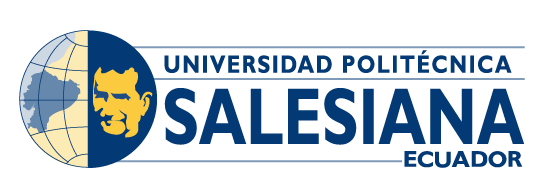

## Roberto Pacho



### Juego de la vida de Conway
El juego de la vida tiene su origen en el año de 1970 en la revista Scientific American; debido a la gran variedad que presentan la evolución de sus patrones este a adquirido una gran cantidad de atención dado que esta es equivalente a una maquina universal de Turing dado que todo lo que se puede computar algorítmicamente se puede computar en el juego de la vida.

#### Reglas del juego
Se trata de un juego de cero jugadores dado que el progreso o evolución del juego viene dado por un patron inicial el cual no requiere la intervención posterior de la persona. Ademas consta de un tablero en el cual cada celda representa una célula las cuales pueden estar en uno de dos posibles estados "vivas" o "muertas"; una célula puede ir intercambiando su estado en cada turno durante el progreso del juego, las células constan de las siguientes reglas para actuar:

Una célula muerta con exactamente 3 células vecinas vivas "nace" (es decir, al turno siguiente estará viva).
Una célula viva con 2 o 3 células vecinas vivas sigue viva, en otro caso muere (por "soledad" o "superpoblación").
Aquí tenemos un pequeño ejemplo en python de nuestro algoritmo para el juego de la vida:

https://playgameoflife.com/

In [ ]:
import pygame
import numpy as np
import time

pygame.init() 
#tamaño d ela pantalla
width,height=500,500

#creacion de la pantalla
pantalla=pygame.display.set_mode((height,  width))

#color de fondo
bg=25,25,25
pantalla.fill(bg) 

#para las celdas
nxC,nyC=25,25

dimCW=width/nxC
dimCH=height/nyC

#estados de las celdas si la celda es 1 viva si es 0 muerta
gameState=np.zeros((nxC,nyC))

#estado del tablero Inicial

#automata Palo
#-gameState[5,3]=1
#-gameState[5,4]=1
#-gameState[5,5]=1
#Automata Movil
gameState[21,21]=1
gameState[22,22]=1
gameState[22,23]=1
gameState[21,23]=1
gameState[20,23]=1

#bucle de ejecucion
while True: 
    #guardamos una copia del estado del juego
    newGameState = np.copy(gameState)
    
    #Limpiamos la informacion
    pantalla.fill(bg)
    time.sleep(0.1)
    for y in range(0,nxC):
        for x in range(0,nyC):
            #Creamos el numero de vecinos cercano
            n_neigh=gameState[(x-1)% nxC,(y-1)%nyC]+ \
                    gameState[(x) % nxC,(y-1)%nyC]+ \
                    gameState[(x+1)% nxC,(y-1)%nyC]+ \
                    gameState[(x-1)% nxC,(y) %nyC]+ \
                    gameState[(x+1)% nxC,(y) %nyC]+ \
                    gameState[(x-1)% nxC,(y+1)%nyC]+ \
                    gameState[(x) % nxC,(y+1)%nyC]+ \
                    gameState[(x+1)% nxC,(y+1)%nyC]
            #reglas
            #1 una celula muerta con 3 vecinos vivos revive
            if gameState[x,y] == 0 and n_neigh == 3:
                newGameState[x,y] =1
            #2 una celula viva con menos de 2 o mas de 3 vecinos vivos muere
            elif gameState[x,y] == 1 and (n_neigh < 2 or n_neigh > 3):
                newGameState[x,y] =0
            #Celdas
            poly=[((x)*dimCW,y*dimCH),
                  ((x+1)*dimCW,y*dimCH),
                  ((x+1)*dimCW,(y+1)*dimCH),
                  ((x)*dimCW,(y+1)*dimCH)]
            
            #dibujamos la celda para cada par de x e y
            pygame.draw.polygon(pantalla,(128,128,128),poly,int(abs(1- newGameState[x,y])))
            #if newGameState[x,y] == 0:
             #   pygame.draw.polygon(pantalla,(128,128,128),poly,1)
            #else:
             #   pygame.draw.polygon(pantalla,(255,255,255),poly,0)
                
            #Actualizamos el estado del juego
    gameState = np.copy(newGameState)
    time.sleep(0.5)
    pygame.display.flip()

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


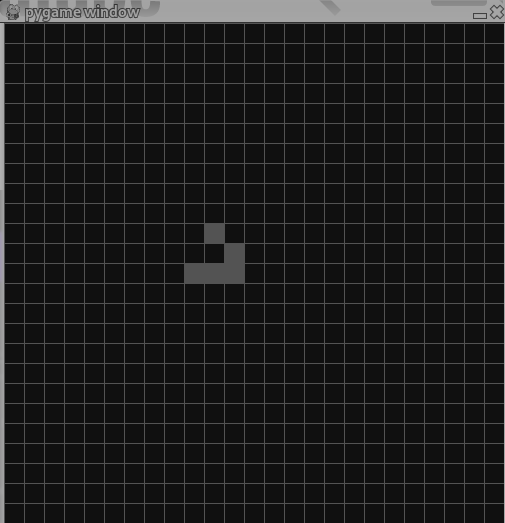

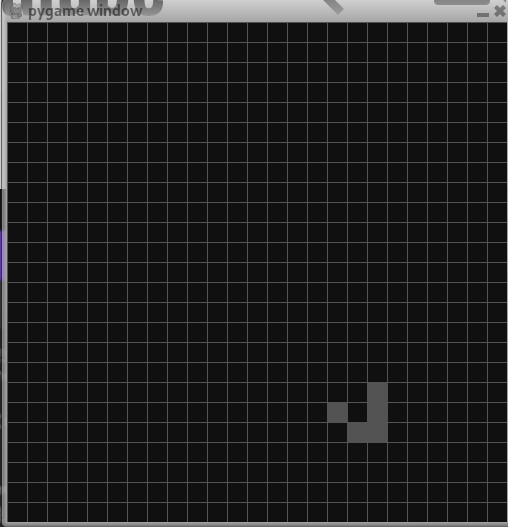
